DATASET GENERATION CODE

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define districts
districts = ['Bhaktapur', 'Chitwan', 'Dhading', 'Dolakha', 'Kathmandu', 'Kavrepalanchok',
             'Lalitpur', 'Makwanpur', 'Nuwakot', 'Ramechhap', 'Rasuwa', 'Sindhuli', 'Sindhupalchok']

# Student_Records.csv (50,000 rows)
n_students = 50000
student_data = {
    'Student_ID': range(1, n_students + 1),
    'School_ID': np.random.randint(1, 501, n_students),
    'Grade': np.random.randint(6, 13, n_students),
    'Gender': np.random.choice(['M', 'F'], n_students, p=[0.5, 0.5]),
    'Socioeconomic_Status': np.random.choice(['Low', 'Medium', 'High'], n_students, p=[0.4, 0.4, 0.2]),
    'Attendance_Rate': np.clip(np.random.normal(85, 8, n_students), 50, 100).round(2),
    'Previous_Year_GPA': np.clip(np.random.normal(2.8, 0.4, n_students), 1, 4).round(2),
    'Parental_Education_Level': np.random.choice(['None', 'Primary', 'Secondary', 'Higher'], n_students, p=[0.2, 0.3, 0.3, 0.2]),
    'Distance_to_School_km': np.clip(np.random.exponential(4, n_students), 0.5, 15).round(2),
    'Dropout_Status': np.random.choice(['Y', 'N'], n_students, p=[0.5, 0.5]),
    'Dropout_Reason': ['None'] * n_students
}
student_df = pd.DataFrame(student_data)
# Adjust features for dropouts to enhance correlations
student_df.loc[student_df['Dropout_Status'] == 'Y', 'Attendance_Rate'] = np.clip(
    student_df.loc[student_df['Dropout_Status'] == 'Y', 'Attendance_Rate'] - 12, 50, 100).round(2)
student_df.loc[student_df['Dropout_Status'] == 'Y', 'Previous_Year_GPA'] = np.clip(
    student_df.loc[student_df['Dropout_Status'] == 'Y', 'Previous_Year_GPA'] - 0.6, 1, 4).round(2)
student_df.loc[student_df['Dropout_Status'] == 'Y', 'Distance_to_School_km'] = np.clip(
    student_df.loc[student_df['Dropout_Status'] == 'Y', 'Distance_to_School_km'] + 3, 0.5, 15).round(2)
dropout_reasons = ['Economic Hardship', 'Early Marriage', 'Lack of Interest', 'Natural Disasters']
student_df.loc[student_df['Dropout_Status'] == 'Y', 'Dropout_Reason'] = np.random.choice(
    dropout_reasons, sum(student_df['Dropout_Status'] == 'Y'), p=[0.4, 0.3, 0.2, 0.1])
student_df.to_csv('Student_Records.csv', index=False)

# School_Info.csv (500 rows)
school_data = {
    'School_ID': range(1, 501),
    'District': np.random.choice(districts, 500),
    'Location_Type': np.random.choice(['Urban', 'Rural', 'Hilly'], 500, p=[0.4, 0.3, 0.3]),
    'School_Type': np.random.choice(['Public', 'Private'], 500, p=[0.7, 0.3]),
    'Infrastructure_Score': np.clip(np.random.normal(3.5, 0.7, 500), 1, 5).round(2),
    'Electricity_Access': np.random.choice(['Yes', 'No'], 500, p=[0.85, 0.15]),
    'Internet_Access': np.random.choice(['Yes', 'No'], 500, p=[0.65, 0.35]),
    'Library_Status': np.random.choice(['Yes', 'No'], 500, p=[0.75, 0.25]),
    'Teacher_Quality_Score': np.clip(np.random.normal(3.7, 0.6, 500), 1, 5).round(2),
    'Dropout_Rate': np.clip(np.random.normal(15, 3.5, 500), 5, 25).round(2),
    'Major_Dropout_Reason': np.random.choice(dropout_reasons, 500, p=[0.4, 0.3, 0.2, 0.1])
}
school_df = pd.DataFrame(school_data)
# Adjust Dropout_Rate based on Infrastructure and Teacher Quality
school_df['Dropout_Rate'] = np.clip(
    school_df['Dropout_Rate'] + (5 - school_df['Infrastructure_Score']) * 1.5 - school_df['Teacher_Quality_Score'] * 0.5,
    5, 25).round(2)
school_df.to_csv('School_Info.csv', index=False)

# District_Level_Stats.csv (13 rows)
district_data = {
    'District': districts,
    'Literacy_Rate': np.clip(np.random.normal(75, 7, 13), 55, 90).round(2),
    'Poverty_Rate': np.clip(np.random.normal(20, 6, 13), 10, 35).round(2),
    'Avg_School_Distance_km': np.clip(np.random.normal(4, 1.2, 13), 2, 8).round(2)
}
district_df = pd.DataFrame(district_data)
district_df.to_csv('District_Level_Stats.csv', index=False)

# Teacher_Deployment.csv (5,000 rows)
teacher_data = {
    'Teacher_ID': range(1, 5001),
    'School_ID': np.random.randint(1, 501, 5000),
    'Student_Teacher_Ratio': np.clip(np.random.normal(20, 3, 5000), 15, 30).round(2),
    'Subjects_Taught': np.random.choice(['Math', 'Science', 'English', 'Social Studies'], 5000)
}
teacher_df = pd.DataFrame(teacher_data)
teacher_df.to_csv('Teacher_Deployment.csv', index=False)

print("Datasets generated: Student_Records.csv, School_Info.csv, District_Level_Stats.csv, Teacher_Deployment.csv")

Datasets generated: Student_Records.csv, School_Info.csv, District_Level_Stats.csv, Teacher_Deployment.csv


DATASET MERGING CODE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Set random seed for reproducibility
np.random.seed(42)

# Load datasets
student_df = pd.read_csv('Student_Records.csv')
school_df = pd.read_csv('School_Info.csv')
district_df = pd.read_csv('District_Level_Stats.csv')
teacher_df = pd.read_csv('Teacher_Deployment.csv')

# Aggregate Teacher_Deployment to school level
teacher_agg = teacher_df.groupby('School_ID').agg({'Student_Teacher_Ratio': 'mean'}).reset_index()
teacher_agg['Student_Teacher_Ratio'] = teacher_agg['Student_Teacher_Ratio'].round(2)

# Merge datasets
merged_df = student_df.merge(school_df, on='School_ID', how='left')
merged_df = merged_df.merge(district_df, on='District', how='left')
merged_df = merged_df.merge(teacher_agg, on='School_ID', how='left')

# Fill missing values in 'Parental_Education_Level' and 'Dropout_Reason'
merged_df['Parental_Education_Level'] = merged_df['Parental_Education_Level'].fillna('Unknown')
merged_df['Dropout_Reason'] = merged_df['Dropout_Reason'].fillna('None')


# Add new features with decimals rounded to 2
merged_df['Socioeconomic_Status_Encoded'] = LabelEncoder().fit_transform(merged_df['Socioeconomic_Status'])
merged_df['Parental_Education_Level_Encoded'] = LabelEncoder().fit_transform(merged_df['Parental_Education_Level'])
merged_df['Gender_Encoded'] = LabelEncoder().fit_transform(merged_df['Gender'])
merged_df['Economic_Instability_Score'] = (
    0.5 * merged_df['Socioeconomic_Status_Encoded'] / merged_df['Socioeconomic_Status_Encoded'].max() +
    0.3 * merged_df['Poverty_Rate'] / merged_df['Poverty_Rate'].max() +
    0.2 * merged_df['Parental_Education_Level_Encoded'] / merged_df['Parental_Education_Level_Encoded'].max()
).round(2)
merged_df['Cultural_Barrier_Score'] = (
    0.5 * (merged_df['Gender_Encoded'] == LabelEncoder().fit_transform(['F'])[0]).astype(int) *
    (merged_df['District'].isin(['Sindhuli', 'Rasuwa', 'Sindhupalchok'])).astype(int) * 0.4 +
    0.3 * merged_df['Parental_Education_Level_Encoded'] / merged_df['Parental_Education_Level_Encoded'].max() +
    0.2 * (merged_df['District'].isin(['Kavrepalanchok', 'Sindhupalchok', 'Rasuwa'])).astype(int)
).round(2)
merged_df['School_Access_Score'] = (
    0.4 * merged_df['Distance_to_School_km'] / merged_df['Distance_to_School_km'].max() +
    0.3 * merged_df['Avg_School_Distance_km'] / merged_df['Avg_School_Distance_km'].max() +
    0.3 * (5 - merged_df['Infrastructure_Score']) / (5 - merged_df['Infrastructure_Score'].min())
).round(2)

# Verify no missing values
assert merged_df.isna().sum().sum() == 0, "Missing values detected!"

# Select columns
columns_to_keep = [
    'Student_ID', 'School_ID', 'Grade', 'Gender_Encoded', 'Socioeconomic_Status_Encoded',
    'Attendance_Rate', 'Previous_Year_GPA', 'Parental_Education_Level_Encoded',
    'Distance_to_School_km', 'Dropout_Status', 'Dropout_Reason', 'District',
    'Location_Type', 'School_Type', 'Infrastructure_Score', 'Electricity_Access',
    'Internet_Access', 'Library_Status', 'Teacher_Quality_Score', 'Dropout_Rate',
    'Major_Dropout_Reason', 'Literacy_Rate', 'Poverty_Rate', 'Avg_School_Distance_km',
    'Student_Teacher_Ratio', 'Economic_Instability_Score', 'Cultural_Barrier_Score',
    'School_Access_Score'
]
merged_df = merged_df[columns_to_keep]

# Save merged dataset
merged_df.to_csv('Merged_Education_Data.csv', index=False)
print("Merged dataset saved: Merged_Education_Data.csv")
print("\nMerged Dataset Columns:", merged_df.columns.tolist())
print("\nDataset Info:")
print(merged_df.info())
print("\nDistrict Coverage:", merged_df['District'].nunique())

Merged dataset saved: Merged_Education_Data.csv

Merged Dataset Columns: ['Student_ID', 'School_ID', 'Grade', 'Gender_Encoded', 'Socioeconomic_Status_Encoded', 'Attendance_Rate', 'Previous_Year_GPA', 'Parental_Education_Level_Encoded', 'Distance_to_School_km', 'Dropout_Status', 'Dropout_Reason', 'District', 'Location_Type', 'School_Type', 'Infrastructure_Score', 'Electricity_Access', 'Internet_Access', 'Library_Status', 'Teacher_Quality_Score', 'Dropout_Rate', 'Major_Dropout_Reason', 'Literacy_Rate', 'Poverty_Rate', 'Avg_School_Distance_km', 'Student_Teacher_Ratio', 'Economic_Instability_Score', 'Cultural_Barrier_Score', 'School_Access_Score']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Student_ID                        50000 non-null  int64  
 1   School_ID                     

EDA

Missing Values:
Grade                               0
Gender_Encoded                      0
Socioeconomic_Status_Encoded        0
Attendance_Rate                     0
Previous_Year_GPA                   0
Parental_Education_Level_Encoded    0
Distance_to_School_km               0
Dropout_Status                      0
District                            0
Location_Type                       0
School_Type                         0
Infrastructure_Score                0
Electricity_Access                  0
Internet_Access                     0
Library_Status                      0
Teacher_Quality_Score               0
Dropout_Rate                        0
Major_Dropout_Reason                0
Literacy_Rate                       0
Poverty_Rate                        0
Avg_School_Distance_km              0
Student_Teacher_Ratio               0
Economic_Instability_Score          0
Cultural_Barrier_Score              0
School_Access_Score                 0
dtype: int64

Summary Statistics f

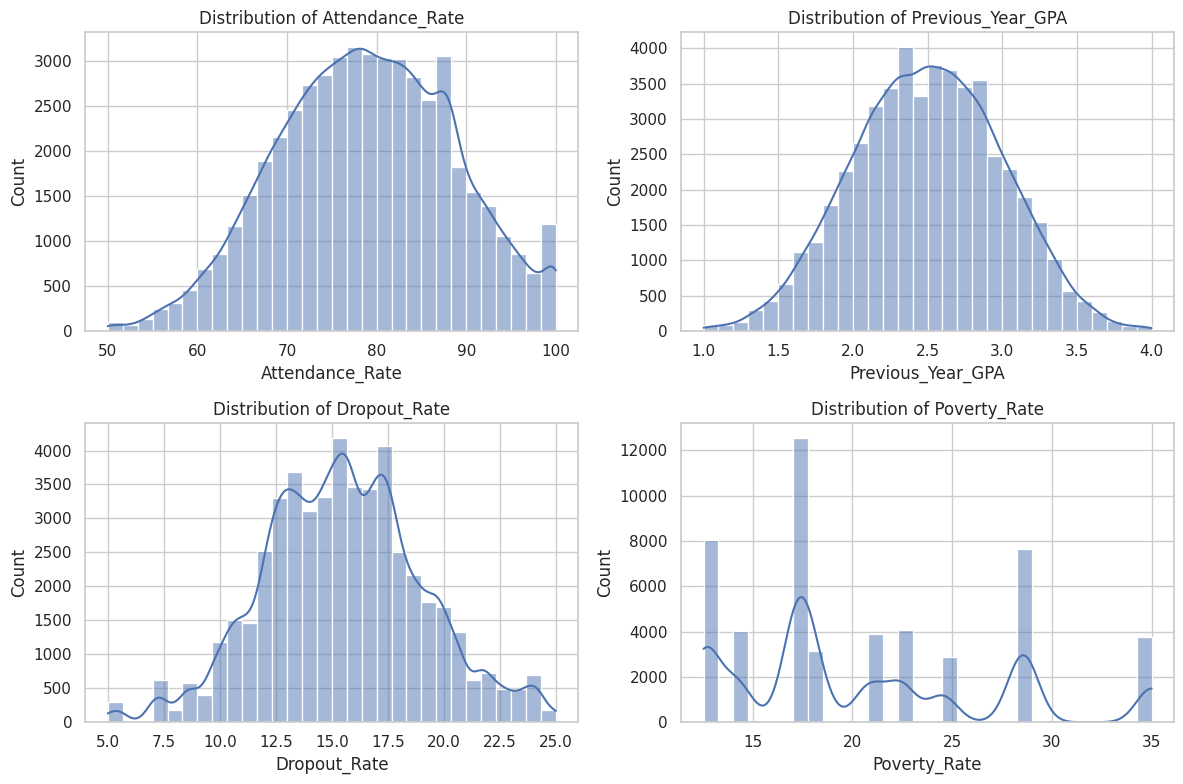

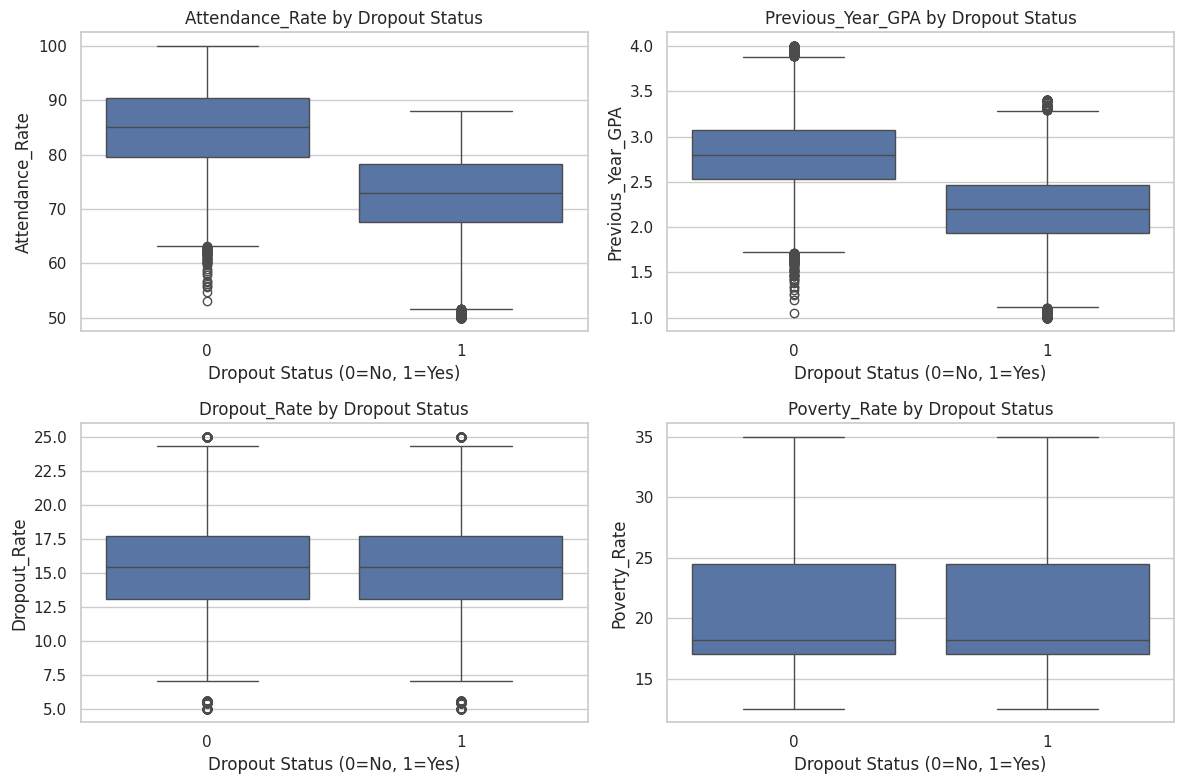

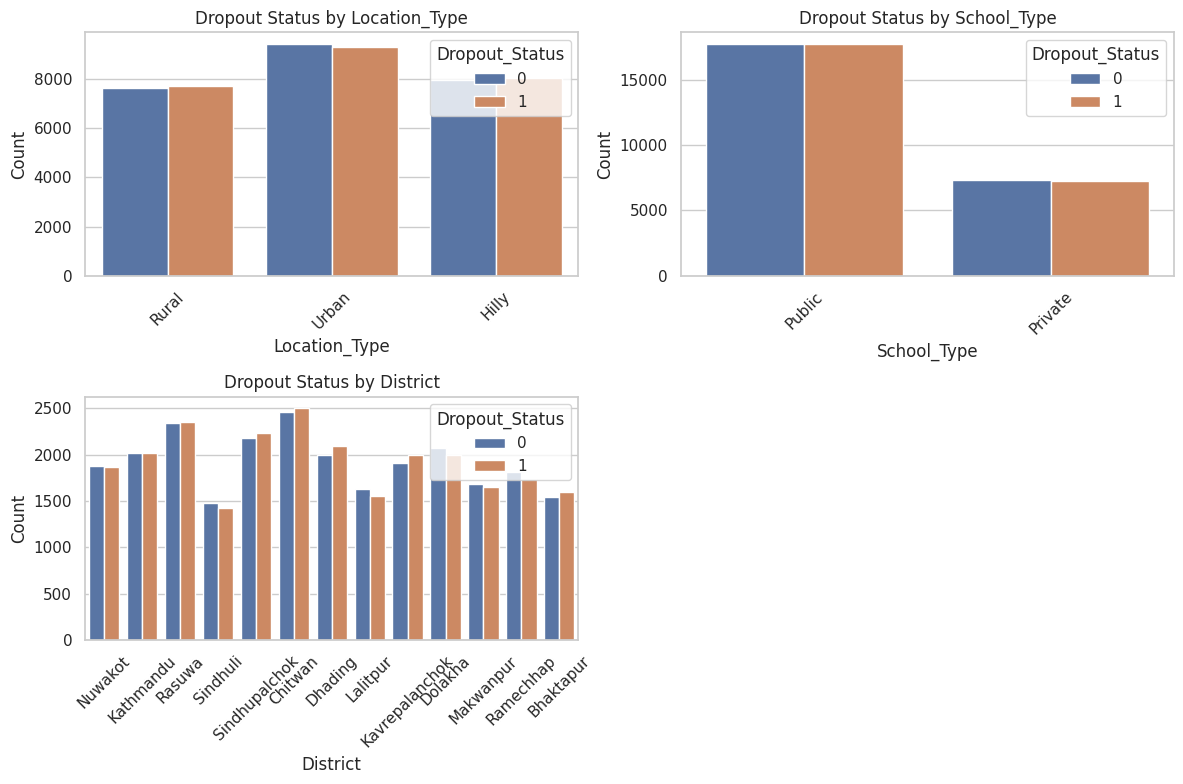

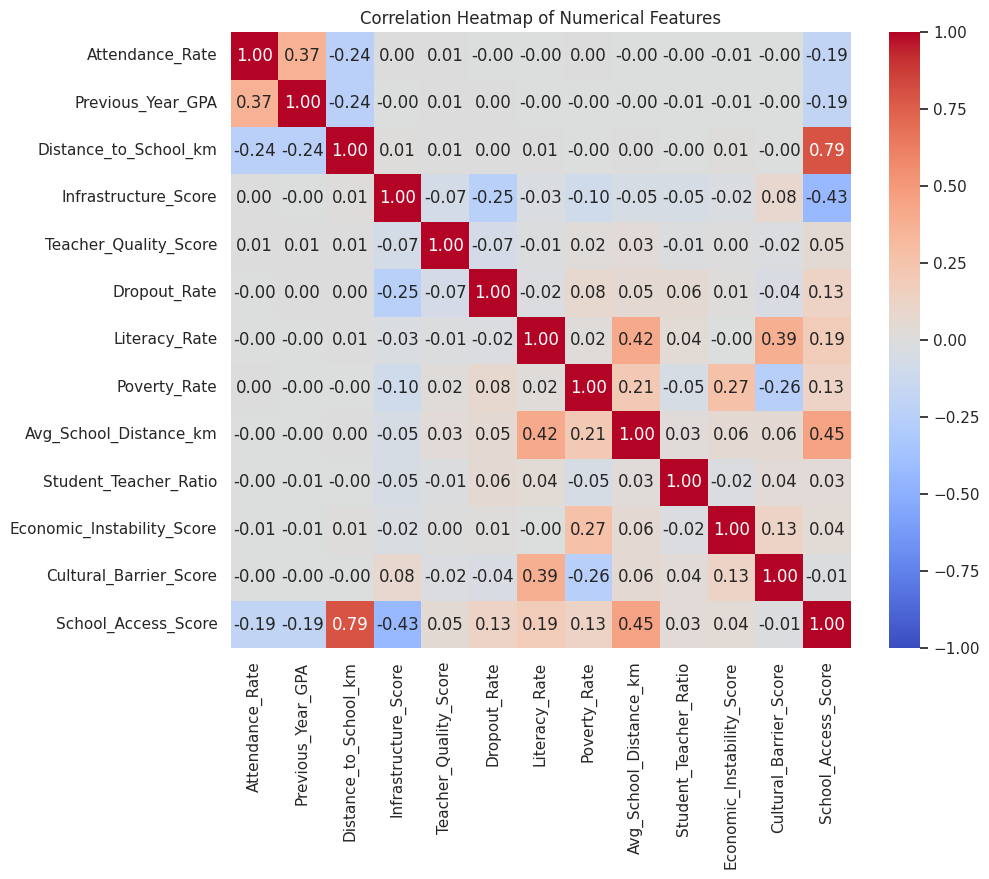

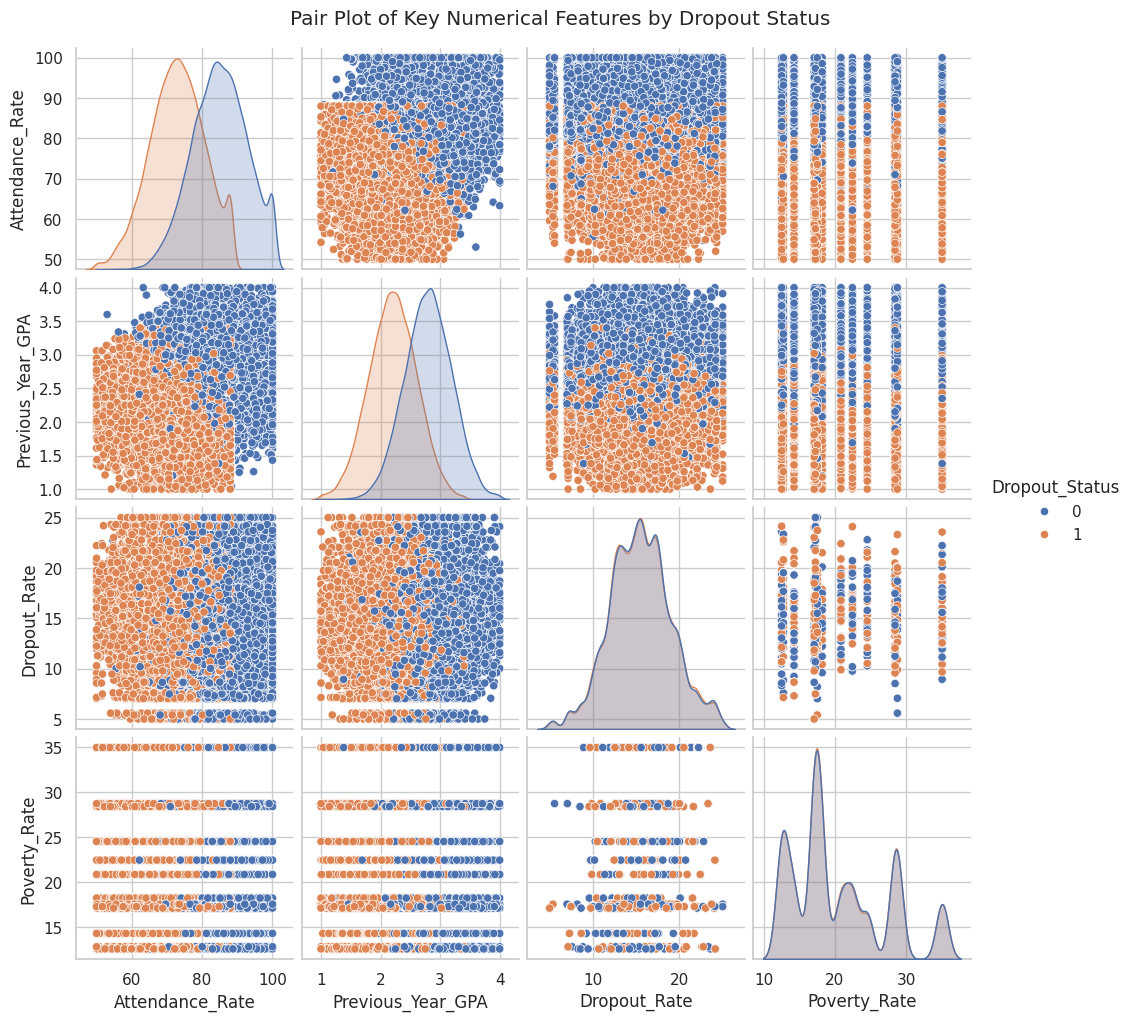

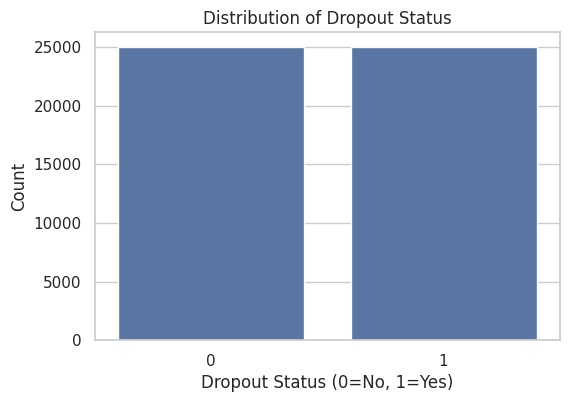

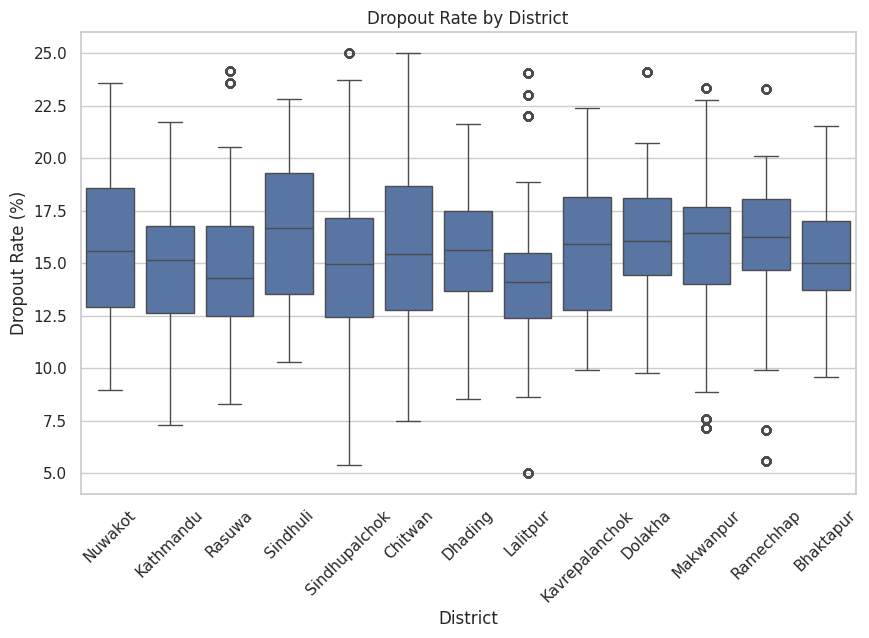

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style for better visualizations
sns.set(style="whitegrid")

# Loading the dataset
data = pd.read_csv('Merged_Education_Data.csv')

# Dropping irrelevant columns
columns_to_drop = ['Student_ID', 'School_ID', 'Dropout_Reason']
data = data.drop(columns=columns_to_drop)

# Converting Dropout_Status to binary (Y=1, N=0)
data['Dropout_Status'] = data['Dropout_Status'].map({'Y': 1, 'N': 0})

# Checking for missing values
print("Missing Values:")
print(data.isnull().sum())

# Summary statistics for numerical features
numerical_features = [
    'Attendance_Rate', 'Previous_Year_GPA', 'Distance_to_School_km',
    'Infrastructure_Score', 'Teacher_Quality_Score', 'Dropout_Rate',
    'Literacy_Rate', 'Poverty_Rate', 'Avg_School_Distance_km',
    'Student_Teacher_Ratio', 'Economic_Instability_Score',
    'Cultural_Barrier_Score', 'School_Access_Score'
]
print("\nSummary Statistics for Numerical Features:")
print(data[numerical_features].describe())

# Summary for categorical features
categorical_features = [
    'Grade', 'Gender_Encoded', 'Socioeconomic_Status_Encoded',
    'Parental_Education_Level_Encoded', 'District', 'Location_Type',
    'School_Type', 'Electricity_Access', 'Internet_Access',
    'Library_Status', 'Major_Dropout_Reason'
]
print("\nValue Counts for Categorical Features:")
for col in categorical_features:
    print(f"\n{col}:")
    print(data[col].value_counts())

# Distribution plots for key numerical features
key_numerical = ['Attendance_Rate', 'Previous_Year_GPA', 'Dropout_Rate', 'Poverty_Rate']
plt.figure(figsize=(12, 8))
for i, col in enumerate(key_numerical, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Box plots for numerical features by Dropout_Status
plt.figure(figsize=(12, 8))
for i, col in enumerate(key_numerical, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Dropout_Status', y=col, data=data)
    plt.title(f'{col} by Dropout Status')
    plt.xlabel('Dropout Status (0=No, 1=Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Bar plots for categorical features by Dropout_Status
key_categorical = [ 'Location_Type', 'School_Type', 'District']
plt.figure(figsize=(12, 8))
for i, col in enumerate(key_categorical, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Dropout_Status', data=data)
    plt.title(f'Dropout Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Pair plot for key numerical features colored by Dropout_Status
sns.pairplot(data[key_numerical + ['Dropout_Status']], hue='Dropout_Status', diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features by Dropout Status', y=1.02)
plt.show()

# Count plot for Dropout_Status to check class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Dropout_Status', data=data)
plt.title('Distribution of Dropout Status')
plt.xlabel('Dropout Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# Dropout_Rate by District
plt.figure(figsize=(10, 6))
sns.boxplot(x='District', y='Dropout_Rate', data=data)
plt.title('Dropout Rate by District')
plt.xlabel('District')
plt.ylabel('Dropout Rate (%)')
plt.xticks(rotation=45)
plt.show()

MODEL TRAINING OF XGBOOST

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}

Regression Model (XGBoost) Evaluation for Dropout_Rate:
Mean Squared Error: 0.1993
Mean Absolute Error: 0.3387
R² Score: 0.9843


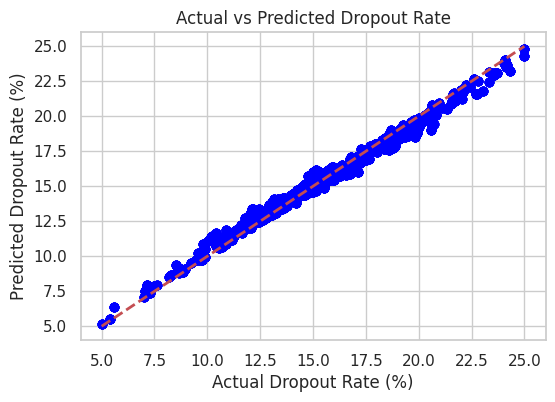


Top 10 Feature Importances:
                                   Feature  Importance
27                      District_Kathmandu    0.105159
39                  Electricity_Access_Yes    0.089864
30                      District_Makwanpur    0.073717
44  Major_Dropout_Reason_Natural Disasters    0.063674
36                     Location_Type_Rural    0.051713
32                      District_Ramechhap    0.047016
7                   Avg_School_Distance_km    0.046148
42  Major_Dropout_Reason_Economic Hardship    0.045449
40                     Internet_Access_Yes    0.041805
6                             Poverty_Rate    0.041405


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('Merged_Education_Data.csv')

# Dropping irrelevant columns
columns_to_drop = ['Student_ID', 'School_ID', 'Dropout_Reason', 'Dropout_Status']
data = data.drop(columns=columns_to_drop)

# Handling outliers in numerical features (capping at 1st and 99th percentiles)
numerical_features = [
    'Attendance_Rate', 'Previous_Year_GPA', 'Distance_to_School_km',
    'Infrastructure_Score', 'Teacher_Quality_Score', 'Literacy_Rate',
    'Poverty_Rate', 'Avg_School_Distance_km', 'Student_Teacher_Ratio',
    'Economic_Instability_Score', 'Cultural_Barrier_Score', 'School_Access_Score'
]
for col in numerical_features:
    lower, upper = data[col].quantile([0.01, 0.99])
    data[col] = data[col].clip(lower, upper)

# Defining categorical features
categorical_features = [
    'Grade', 'Gender_Encoded', 'Socioeconomic_Status_Encoded',
    'Parental_Education_Level_Encoded', 'District', 'Location_Type',
    'School_Type', 'Electricity_Access', 'Internet_Access',
    'Library_Status', 'Major_Dropout_Reason'
]

# Splitting data
X = data.drop(columns=['Dropout_Rate'])
y = data['Dropout_Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Regression pipeline with XGBoost
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Defining hyperparameter grid for tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__subsample': [0.8, 1.0]
}

# Performing grid search
grid_search = GridSearchCV(reg_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predicting on test set
y_pred = best_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Model (XGBoost) Evaluation for Dropout_Rate:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualizing actual vs predicted Dropout_Rate
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Dropout Rate (%)')
plt.ylabel('Predicted Dropout Rate (%)')
plt.title('Actual vs Predicted Dropout Rate')
plt.show()

# Feature importance (if needed)
feature_names = numerical_features + list(best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importances = best_model.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
print("\nTop 10 Feature Importances:")
print(importance_df)

k MEANS

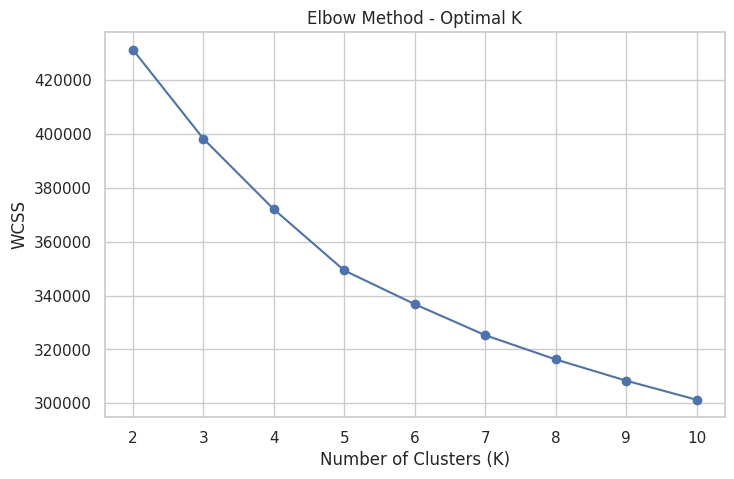

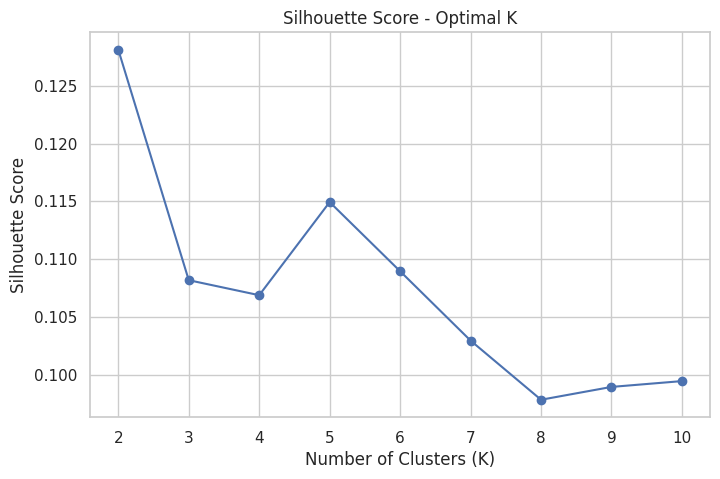


Cluster Summary:
          Attendance_Rate  Previous_Year_GPA  Distance_to_School_km  \
Cluster                                                              
0                  71.84               2.14                   5.32   
1                  77.20               2.41                  11.44   
2                  79.55               2.52                   4.24   
3                  86.00               2.86                   2.77   

         Teacher_Quality_Score  Dropout_Rate  Literacy_Rate  Poverty_Rate  \
Cluster                                                                     
0                         3.68         15.27          76.42         17.38   
1                         3.76         15.89          78.39         20.56   
2                         3.79         16.04          74.96         29.75   
3                         3.70         15.19          76.69         17.57   

         Student_Teacher_Ratio  Economic_Instability_Score  \
Cluster                            

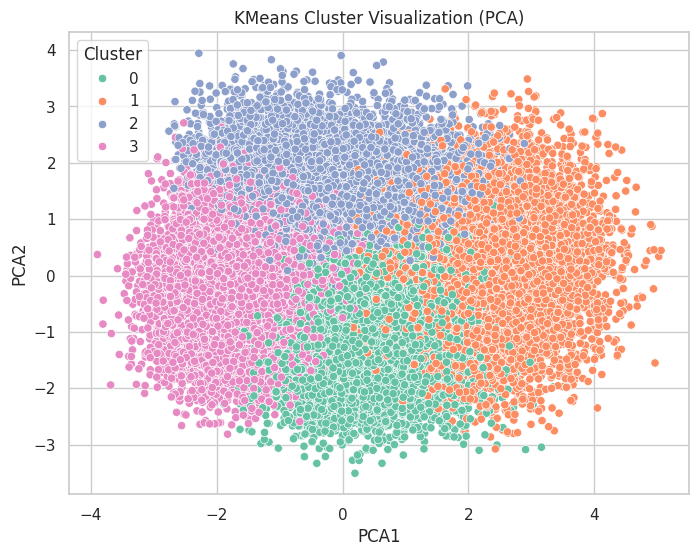

Explained Variance Ratio: [0.20871285 0.13039975]
Total Explained Variance: 0.33911260283508987


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the merged dataset
data = pd.read_csv('Merged_Education_Data.csv')

# Select relevant numeric features for clustering
features = [
    'Attendance_Rate',
    'Previous_Year_GPA',
    'Distance_to_School_km',
    'Teacher_Quality_Score',
    'Dropout_Rate',
    'Literacy_Rate',
    'Poverty_Rate',
    'Student_Teacher_Ratio',
    'Economic_Instability_Score',
    'School_Access_Score'
]

X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal K using Elbow Method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Determine optimal K using Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Apply KMeans with chosen K (example K=4 based on Elbow/Silhouette)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze Cluster Summary
cluster_summary = data.groupby('Cluster')[features].mean().round(2)
print("\nCluster Summary:\n", cluster_summary)

# Visualize clusters using PCA (2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('KMeans Cluster Visualization (PCA)')
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))